In [1]:
# !pip install seaborn

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [3]:
ds = pd.read_csv("adult.csv")
print(len(ds))
ds = ds[:5000]
print(len(ds))
ds.head(10)

48842
5000


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


<Axes: >

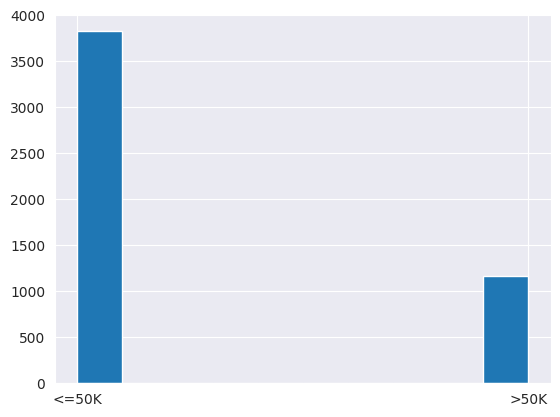

In [4]:
ds['income'].hist()

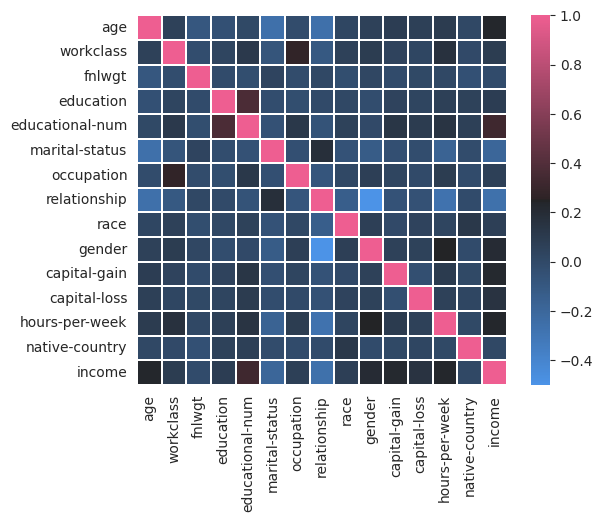

In [5]:
# Encode categorical variables
from sklearn.preprocessing import LabelEncoder

ds_encoded = ds.copy()
label_encoders = {}
for column in ds_encoded.columns:
    if ds_encoded[column].dtype == 'object':
        label_encoders[column] = LabelEncoder()
        ds_encoded[column] = label_encoders[column].fit_transform(ds_encoded[column])

# Calculate correlation
corr = ds_encoded.corr(method="pearson")

import seaborn as sns
import matplotlib.pyplot as plt

cmap = sns.diverging_palette(250, 354, 80, 60, center='dark', as_cmap=True)
sns.heatmap(corr, vmax=1, vmin=-0.5, cmap=cmap, square=True, linewidths=0.2)
plt.show()


In [12]:
# ds['categorical_age'] = pd.cut(ds['age'].values, bins = 8, labels=[0,1,2,3,4,5,6,7])
# ds['categorical_fnlwgt'] = pd.cut(ds['fnlwgt'].values, bins = 8, labels=[0,1,2,3,4,5,6,7])
# ds['categorical_captial_gain'] = pd.cut(ds['capital-gain'].values, bins = 8, labels=[0,1,2,3,4,5,6,7])
# ds['categorical_captial_loss'] = pd.cut(ds['capital-loss'].values, bins = 8, labels=[0,1,2,3,4,5,6,7])
# ds['categorical_hours_per_week'] = pd.cut(ds['hours-per-week'].values, bins = 8, labels=[0,1,2,3,4,5,6,7])

# ds['categorical_ednum'] = pd.cut(ds['educational-num'].values, bins = 8, labels=[0,1,2,3,4,5,6,7])

# # ds = ds.drop(columns=['age', 'fnlwgt', 'capital-gain','capital-loss','hours-per-week' ])
# ds = ds.drop(columns=['categorical_captial_gain','categorical_fnlwgt','categorical_ednum','categorical_captial_loss'] )

# print(ds.head(10))



In [24]:
ds = ds # including all the features as everythin is not positively correlated
ds.head(5)

# Drop features other than "educational-num", "categorical_hours_per_week", "relationship", and "occupation"
selected_features = ["workclass", "educational-num", "categorical_hours_per_week", "relationship", "occupation", "income"]
ds = ds[selected_features]

# Check the resulting dataset
print(ds.head(10))
ds.replace('?', np.nan, inplace=True)
ds = ds[selected_features].dropna()
print("Length of the dataset after dropping records with null values:",len(ds))


          workclass  educational-num categorical_hours_per_week  \
0           Private                7                          3   
1           Private                9                          3   
2         Local-gov               12                          3   
3           Private               10                          3   
4                 ?               10                          2   
5           Private                6                          2   
6                 ?                9                          3   
7  Self-emp-not-inc               15                          2   
8           Private               10                          3   
9           Private                4                          0   

    relationship         occupation income  
0      Own-child  Machine-op-inspct  <=50K  
1        Husband    Farming-fishing  <=50K  
2        Husband    Protective-serv   >50K  
3        Husband  Machine-op-inspct   >50K  
4      Own-child                  ?  

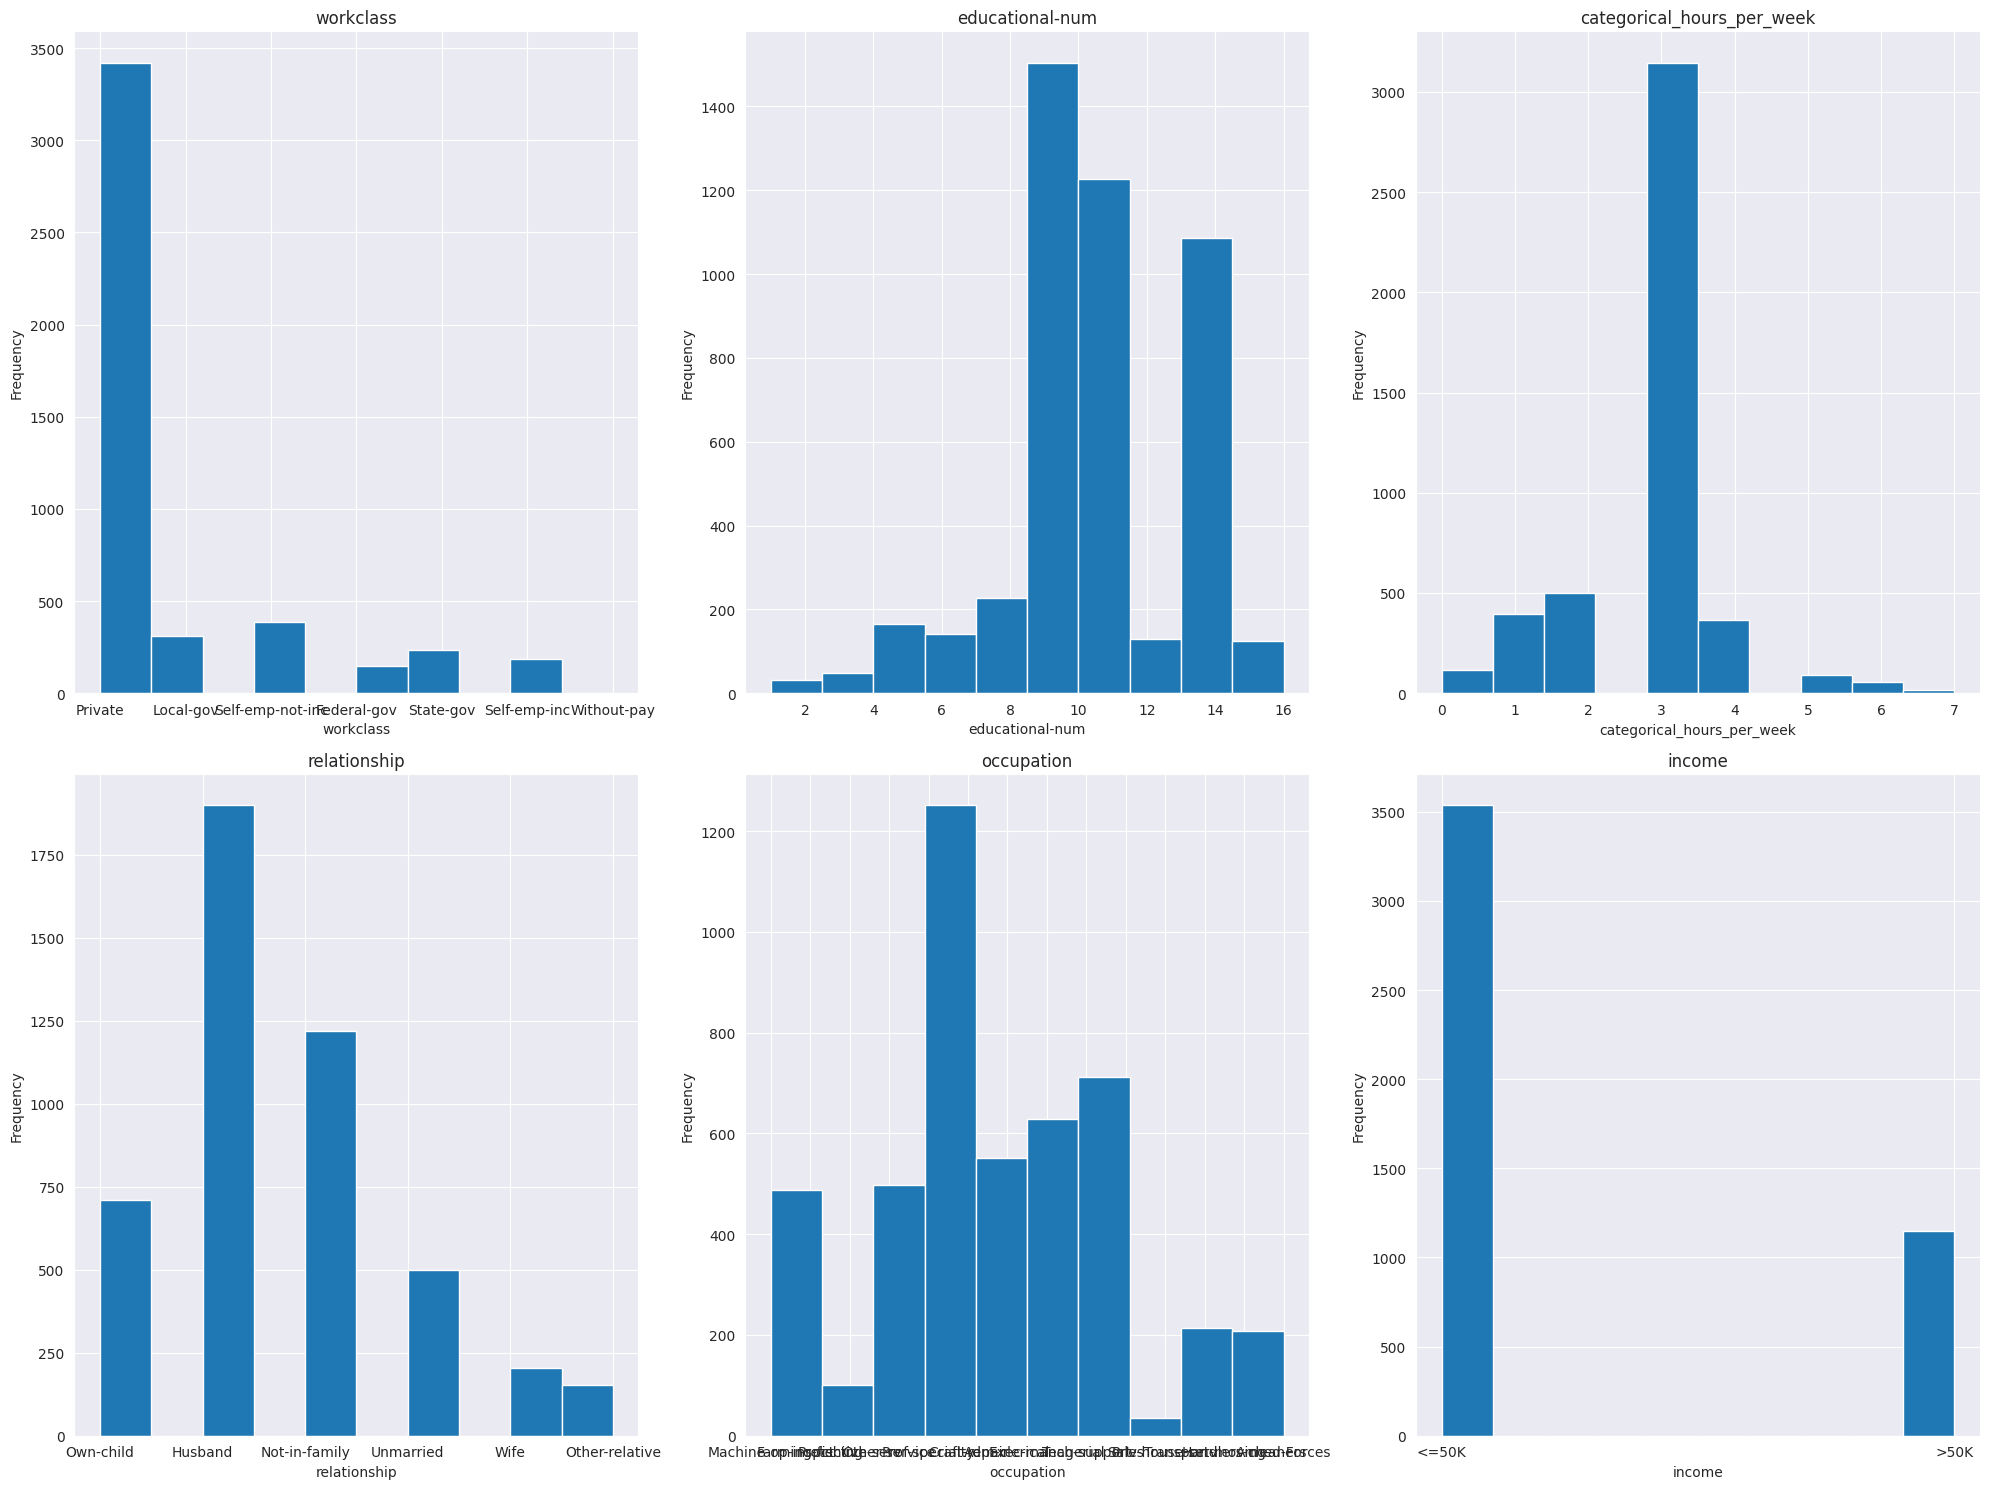

In [25]:
import matplotlib.pyplot as plt

# Define the number of rows and columns for subplots
num_rows = 2  # You can adjust this based on your dataset size
num_cols = 3
total_features = num_rows * num_cols

# Create a figure and axis objects
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 15))

# Flatten the axes array to make it easier to iterate
axes = axes.flatten()

# Plot each feature
for i, column in enumerate(ds.columns):
    if i < 15:  # To prevent exceeding the number of subplots
        ax = axes[i]
        ds[column].hist(ax=ax)
        ax.set_title(column)
        ax.set_xlabel(column)
        ax.set_ylabel('Frequency')

# # Remove any unused subplots
# for i in range(len(ds.columns), total_features):
#     fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


In [80]:
def calculatePrior(df, Y):
    classes = sorted(list(df[Y].unique())) # get all the class labels as a list

    prior = []

    for classi in classes:
        prior.append(len(df[df[Y] == classi])/len(df))   # calculates prior prob -- n(Ci)/n(X) -- Ci -- denotes no. of classes where df[Y] == class i
    
    return prior

# ds.head(10)

    

In [27]:
def calculate_likelihood(df, feature_name, feature_val, Y,label):
    feature = list(df.columns)
    df = df[df[Y] == label]
    p_x_given_y = len(df[df[feature_name] == feature_val])/len(df)
    return p_x_given_y

In [28]:
def naive_bayes_categorical(df, X,Y):
    features = list(df.columns)[:-1]

    prior = calculatePrior(df,Y)

    Y_pred = []

    for x in X:
        labels = sorted(list(df[Y].unique()))
        likelihood = [1]*len(labels)
        for j in range(len(labels)):
            for i in range(len(features)):
                likelihood[j] *= calculate_likelihood(df, features[i], x[i], Y, labels[j])


        post_prob = [i]*len(labels)
        for j in range(len(labels)):
            post_prob[j] = likelihood[j]*prior[j]
        

        Y_pred.append(np.argmax(post_prob))

    return np.array(Y_pred)

**Running the model**

In [81]:
# from sklearn.model_selection import train_test_split
# train1, test = train_test_split(ds, test_size=0.2, random_state=41)

# X_test = test.iloc[:,:-1].values
# Y_test = test.iloc[:,-1].values
# Y_pred = naive_bayes_categorical(train1, X=X_test, Y='income')




**Combining all the functions to a single class**

In [82]:
# import numpy as np
# import pandas as pd

class NaiveBayesModel:
    def __init__(self):
        self.probabilities = {}  # Placeholder for storing probabilities

    def train(self, df, Y):
        self.features = list(df.columns)[:-1]
        self.classes = sorted(list(df[Y].unique()))

        self.prior = self.calculate_prior(df, Y)

        self.likelihood = {}

        for label in self.classes:
            self.likelihood[label] = {}
            df_label = df[df[Y] == label]
            for feature_name in self.features:
                self.likelihood[label][feature_name] = {}
                for feature_val in df[feature_name].unique():
                    self.likelihood[label][feature_name][feature_val] = self.calculate_likelihood(df_label, feature_name, feature_val)
                    
        print(self.likelihood,'\n', self.prior,'\n',self.probabilities)
    def calculate_prior(self, df, Y):
        prior = []
        for label in self.classes:
            prior.append(len(df[df[Y] == label]) / len(df))
        return prior

    def calculate_likelihood(self, df_label, feature_name, feature_val):
        p_x_given_y = len(df_label[df_label[feature_name] == feature_val]) / len(df_label)
        return p_x_given_y


    def predict(self, X_test):
        Y_pred = []
        for x in X_test:
            post_prob = [0] * len(self.classes)
            for j, label in enumerate(self.classes):
                post_prob[j] = self.prior[j]
                for i, feature_val in enumerate(x):
                    if feature_val in self.likelihood[label][self.features[i]]:
                        # print(label, self.features[i], feature_val)
                        feature_val_prob = self.likelihood[label][self.features[i]][feature_val]
                        post_prob[j] *= feature_val_prob
            Y_pred.append(np.argmax(post_prob))
        return Y_pred



In [83]:

from sklearn.model_selection import train_test_split
train1, test = train_test_split(ds, test_size=0.2, random_state=41)

model = NaiveBayesModel()
model.train(train1, Y='income')
X_test = test.iloc[:,:-1].values
Y_test = test.iloc[:,-1].values
Y_pred = model.predict(X_test)



{'<=50K': {'workclass': {'Private': 0.76253110558123, 'Self-emp-not-inc': 0.0782083185211518, 'Self-emp-inc': 0.024884464984002843, 'Local-gov': 0.059722715961606825, 'State-gov': 0.0458585140419481, 'Federal-gov': 0.02808389619623178, 'Without-pay': 0.0007109847138286527}, 'educational-num': {9: 0.35264841805901176, 10: 0.23569143263419837, 11: 0.04656949875577675, 4: 0.02523995734091717, 15: 0.0039104159260575895, 6: 0.036260220405261286, 3: 0.011375755421258443, 14: 0.034482758620689655, 13: 0.14006398862424457, 12: 0.024173480270174193, 8: 0.01457518663348738, 16: 0.004976892996800568, 1: 0.0028439388553146107, 7: 0.043014575186633486, 5: 0.01848560255954497, 2: 0.005687877710629221}, 'categorical_hours_per_week': {3: 0.6530394596516175, 4: 0.0646996089584074, 5: 0.015997156061144685, 2: 0.12122289370778529, 1: 0.10344827586206896, 0: 0.028439388553146108, 7: 0.003199431212228937, 6: 0.009953785993601137}, 'relationship': {'Not-in-family': 0.3114113046569499, 'Husband': 0.285104870

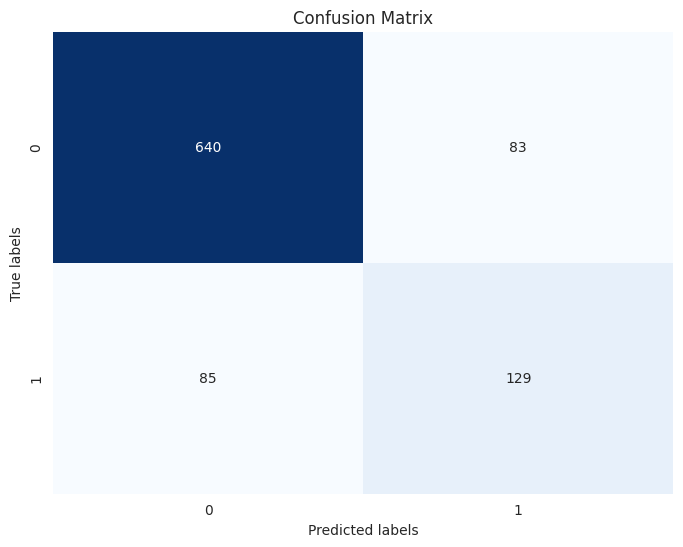

Accuracy: 0.8207043756670224
The F1 Score is: 0.7448058516846938


In [84]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

Y_pred_str = ['<=50K' if label == 0 else '>50K' for label in Y_pred]
conf_mat = confusion_matrix(Y_test, Y_pred_str)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Calculate accuracy
from sklearn.metrics import accuracy_score, f1_score
accuracy = accuracy_score(Y_test, Y_pred_str)
f1 = f1_score(Y_test, Y_pred_str, average='macro')
print("Accuracy:", accuracy)
print("The F1 Score is:", f1)


In [90]:

# Define new instances for prediction
new_instances = [
    ["Private", 9, 3, "Husband", "Exec-managerial"],
    ["Self-emp-not-inc", 10, 1, "Not-in-family", "Sales"],
    ["Local-gov", 12, 5, "Wife", "Prof-specialty"]
]

# Convert new instances to a numpy array
X_new = np.array(new_instances)

# Make predictions
predictions = model.predict(X_new)
print(predictions)
# Print predictions
print("Predictions:")
for i, pred in enumerate(predictions):
    print(f"Instance {i+1}: {'<=50K' if pred == 0 else '>50K'}")

[1, 0, 1]
Predictions:
Instance 1: >50K
Instance 2: <=50K
Instance 3: >50K


In [93]:
# Define new instances for prediction
new_instances = [
    ["Private", 9, 3, "Husband", "Exec-managerial"],
    ["Self-emp-not-inc", 10, 1, "Not-in-family", "Sales"],
    ["Local-gov", 12, 5, "Wife", "Prof-specialty"]
]

# Convert new instances to a numpy array
X_new = np.array(new_instances)

# Make predictions
predictions = model.predict(X_new)

# Print predictions
print("Predictions:")
for i, pred in enumerate(predictions):
    print(f"Instance {i+1}: {'<=50K' if pred == 0 else '>50K'}")

    # Print prior probabilities
    print("Prior probabilities:")
    for label, prior in zip(model.classes, model.prior):
        print(f"    {label}: {prior}")

    # Print posterior probabilities
    print("Posterior probabilities:")
    for j, label in enumerate(model.classes):
        posterior_prob = model.prior[j]
        for k, feature_val in enumerate(X_new[i]):
            if feature_val in model.likelihood[label][model.features[k]]:
                feature_val_prob = model.likelihood[label][model.features[k]][feature_val]
                posterior_prob *= feature_val_prob
        print(f"    {label}: {posterior_prob}")

    # Print likelihoods
    print("Likelihoods:")
    for label in model.classes:
        print(f"    {label}:")
        for j, feature_val in enumerate(X_new[i]):
            if feature_val in model.likelihood[label][model.features[j]]:
                feature_val_prob = model.likelihood[label][model.features[j]][feature_val]
                print(f"        {model.features[j]} = {feature_val}: {feature_val_prob}")
    print()


Predictions:
Instance 1: >50K
Prior probabilities:
    <=50K: 0.7505336179295624
    >50K: 0.24946638207043756
Posterior probabilities:
    <=50K: 0.016705331801345615
    >50K: 0.03068306909919574
Likelihoods:
    <=50K:
        workclass = Private: 0.76253110558123
        relationship = Husband: 0.28510487024528974
        occupation = Exec-managerial: 0.10238179879132599
    >50K:
        workclass = Private: 0.6310160427807486
        relationship = Husband: 0.7593582887700535
        occupation = Exec-managerial: 0.25668449197860965

Instance 2: <=50K
Prior probabilities:
    <=50K: 0.7505336179295624
    >50K: 0.24946638207043756
Posterior probabilities:
    <=50K: 0.002261345829237718
    >50K: 0.00028322875272390215
Likelihoods:
    <=50K:
        workclass = Self-emp-not-inc: 0.0782083185211518
        relationship = Not-in-family: 0.3114113046569499
        occupation = Sales: 0.12371134020618557
    >50K:
        workclass = Self-emp-not-inc: 0.09197860962566845
        rel

In [94]:
from tabulate import tabulate


# Define new instances for prediction
new_instances = [
   ["Private", 9, 3, "Husband", "Exec-managerial"],
   ["Self-emp-not-inc", 10, 1, "Not-in-family", "Sales"],
   ["Local-gov", 12, 5, "Wife", "Prof-specialty"]
]


# Convert new instances to a numpy array
X_new = np.array(new_instances)


# Make predictions
predictions = model.predict(X_new)


# Print predictions
print("Predictions:")
for i, pred in enumerate(predictions):
   print(f"Instance {i+1}: {'<=50K' if pred == 0 else '>50K'}")


   # Initialize table data
   table_data = []


   # Display prior probabilities
   prior_data = [["Prior probabilities"]] + [[label, prior] for label, prior in zip(model.classes, model.prior)]
   table_data.extend(prior_data)


   # Display posterior probabilities
   posterior_data = [["Posterior probabilities"]]
   for j, label in enumerate(model.classes):
       posterior_prob = model.prior[j]
       for k, feature_val in enumerate(X_new[i]):
           if feature_val in model.likelihood[label][model.features[k]]:
               feature_val_prob = model.likelihood[label][model.features[k]][feature_val]
               posterior_prob *= feature_val_prob
       posterior_data.append([label, posterior_prob])
   table_data.extend(posterior_data)


   # Display likelihoods
   likelihood_data = [["Likelihoods"]]
   for j, label in enumerate(model.classes):
       likelihood_data.append([label])
       for k, feature_val in enumerate(X_new[i]):
           if feature_val in model.likelihood[label][model.features[k]]:
               feature_val_prob = model.likelihood[label][model.features[k]][feature_val]
               likelihood_data.append([f"    {model.features[k]} = {feature_val}", feature_val_prob])
   table_data.extend(likelihood_data)


   # Print table
   print(tabulate(table_data, headers=["Class", "Probability"], tablefmt="grid"))
   print()


Predictions:
Instance 1: >50K
+------------------------------+---------------+
| Class                        |   Probability |
+==============================+===============+
| Prior probabilities          |               |
+------------------------------+---------------+
| <=50K                        |     0.750534  |
+------------------------------+---------------+
| >50K                         |     0.249466  |
+------------------------------+---------------+
| Posterior probabilities      |               |
+------------------------------+---------------+
| <=50K                        |     0.0167053 |
+------------------------------+---------------+
| >50K                         |     0.0306831 |
+------------------------------+---------------+
| Likelihoods                  |               |
+------------------------------+---------------+
| <=50K                        |               |
+------------------------------+---------------+
| workclass = Private          |     0.